<figure>
  <IMG SRC="https://raw.githubusercontent.com/fmeer/public-files/main/TUlogo.png" WIDTH=150 ALIGN="right">
</figure>

# CEGM2003 project: Bayesian optimization for truss structures
    
In this notebook, the finite element code `pyJive` is applied to frequency analysis of a truss structure. Specifically, the `ModeShapeModule` is used to compute the natural frequencies of a 37-bar truss bridge structure. The case has been investigated in literature with multiple optimization algorithms, see [Kanarachos et al., 2017](https://dx.doi.org/10.1016/j.compstruc.2016.11.005) for a description of the case and a comparison of the performance of diffferent optimization methods. 
    
Below, the truss is first analyzed with the default settings and then with the optimal parameters from Kanarachos. The notebook demonstrates how to run the finite element program and how to change those inputs that define the design space for the optimization problem. 

In [1]:
import numpy as np
import sys
sys.path.append('../pyJive/')

from utils import proputils as pu
import main
from names import GlobNames as gn

%matplotlib widget

### Starting design

The analysis is based on two input files. The main input file, `bridge_frequency.pro` contains all input parameters and other settings of the analysis. It also refers to a second file `bridge.geom`, which defines the geometry and mesh. The initial input matches the starting point of the optimization procedure following Kanarachos. 

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file bridge.geom ...
InitModule: Creating node groups...
InitModule: Created group bl with nodes [0]
InitModule: Created group br with nodes [19]
InitModule: Created group bm with nodes [9]
InitModule: Created group bottom with nodes [ 0  1  3  5  7  9 11 13 15 17 19]
InitModule: Creating model...
Creating Line2Shape...
mass  using all doftypes by default:  dict_keys(['dx', 'dy'])
Running chain...
ModeShapeModule: running eigenvalue problem...
ModeShapeModule: smallest natural frequency  5.5961e+01 rad / s


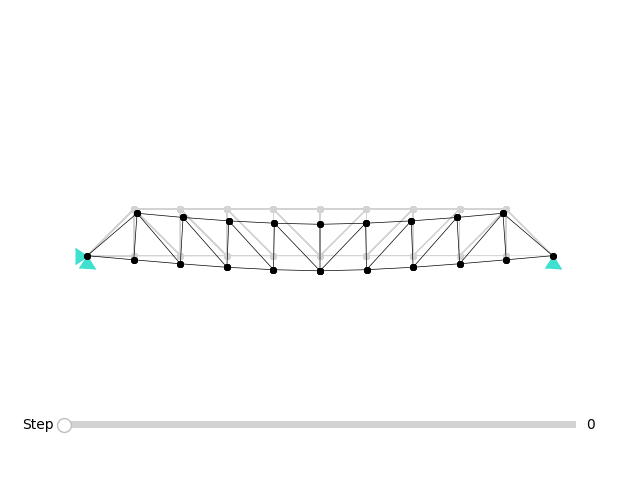

End of execution
Smallest three natural frequencies:  [ 8.90649126 29.59101061 50.01221715]  Hz


In [2]:
# Read the input file and store in props object
props = pu.parse_file('bridge_frequency.pro')

# Call the program and store output in globdat
globdat = main.jive(props)

# Write additional output
print('Smallest three natural frequencies: ', globdat[gn.EIGENFREQS][0:3]/2/np.pi, ' Hz')

### Optimal design from Kanarachos

Now, two changes are made to the problem settings to make the analysis match the optimum solution of Kanarachos. The `props` object, which contains the information from `bridge.pro` in the form of a nested `dict` is overwritten at two of its entries.
- **Cross sectional areas:** these are defined in `props['model']['truss']['area']`
- **Truss geometry:** for this a separate `.geom` file has already been prepared and the program is told to use this one by overwriting the entry `props['init']['mesh']['file']`. Check the differences between the two `.geom`-files in this folder to see how the geometry is updated.

Initializing module chain...
InitModule: Creating DofSpace...
InitModule: Reading geo mesh file bridge_kanarachos.geom ...
InitModule: Creating node groups...
InitModule: Created group bl with nodes [0]
InitModule: Created group br with nodes [19]
InitModule: Created group bm with nodes [9]
InitModule: Created group bottom with nodes [ 0  1  3  5  7  9 11 13 15 17 19]
InitModule: Creating model...
Creating Line2Shape...
mass  using all doftypes by default:  dict_keys(['dx', 'dy'])
Running chain...
ModeShapeModule: running eigenvalue problem...
ModeShapeModule: smallest natural frequency  1.2608e+02 rad / s


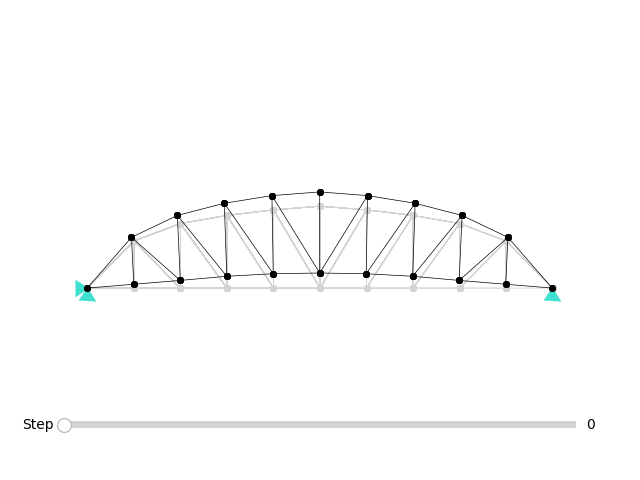

End of execution
Smallest three natural frequencies:  [20.06682059 40.53905183 61.8225322 ]  Hz


In [3]:
# Overwrite relevant inputs
props['model']['truss']['area'] = [ 40e-4, 3.1997e-4, 1.0025e-4, 1.0000e-4, 2.5875e-4, 1.0895e-4, 1.1261e-4, 2.5624e-4, 1.4121e-4, 1.5758e-4, 2.2461e-4, 1.0694e-4, 1.3193e-4, 2.3846e-4, 1.0001e-4 ]
props['init']['mesh']['file'] = 'bridge_kanarachos.geom'

# Call program with updated inputs
globdat = main.jive(props)
print('Smallest three natural frequencies: ', globdat[gn.EIGENFREQS][0:3]/2/np.pi, ' Hz')